<a href="https://colab.research.google.com/github/Sivalakshmi2004/IMAGE-RETRIEVED-ANALYSIS/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**ANALYSIS OF LANDSAT8 RASER IMAGE**

In [ ]:
!pip install rasterio matplotlib numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 72.7 MB/s eta 0:00:00


In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Open the Landsat 8 image
with rasterio.open('/content/drive/MyDrive/LC09_L1TP_143054_20220322_20220322_02_T1_B3.TIF') as src:
     # Get the number of bands in the raster
    num_bands = src.count

    # Print the number of bands
    print('Number of bands:', num_bands)

    for i in range(num_bands):
        band_index = i+1 # Band indices start at 1, not 0
        print('Band', band_index, 'index:', src.indexes[i])


Number of bands: 1
Band 1 index: 1


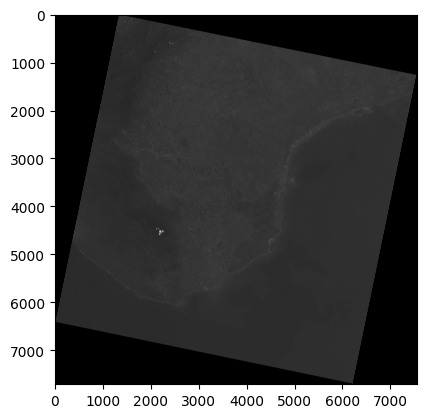

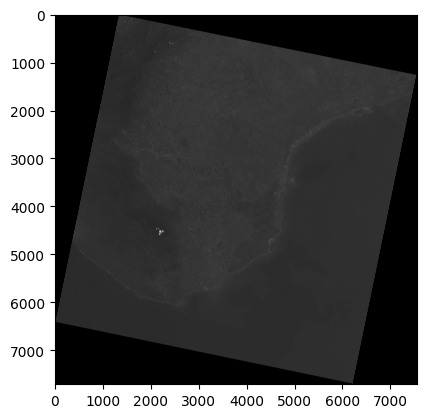

In [ ]:
with rasterio.open('/content/drive/MyDrive/LC09_L1TP_143054_20220322_20220322_02_T1_B3.TIF') as src:
    landsat8 = src.read()

# Display the Landsat 8 image
plt.imshow(landsat8[0,:,:], cmap='gray')
plt.show()

# Display the Landsat 8 bands
for i in range(landsat8.shape[0]):
    plt.imshow(landsat8[i,:,:], cmap='gray')
    plt.show()


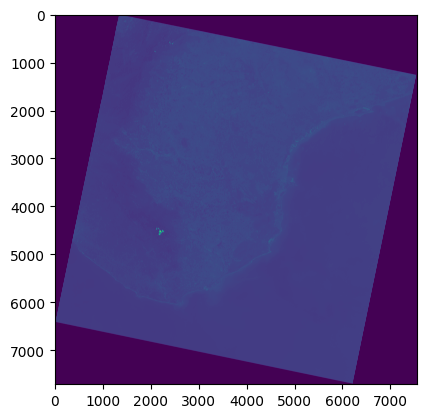

<Axes: >

In [ ]:
# Import necessary libraries
import rasterio.plot as rplt

# Load Landsat 8 satellite image
with rasterio.open('/content/drive/MyDrive/LC09_L1TP_143054_20220322_20220322_02_T1_B3.TIF') as dataset:
    image = dataset.read()

# Display the image in dataset format
rplt.show(image)


In [ ]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

# Open the TIFF image
tiff_image = Image.open('/content/drive/MyDrive/LC09_L1TP_143054_20220322_20220322_02_T1_B3.TIF')

# Convert to PNG format
tiff_image.save('/content/drive/MyDrive/LC09_L1TP_143054_20220322_20220322_02_T1_B3.png')


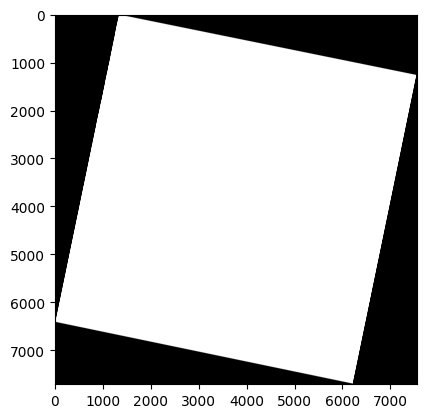

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
# Open the PNG image
png_image = Image.open('/content/drive/MyDrive/LC09_L1TP_143054_20220322_20220322_02_T1_B3.png')

# Display the image
plt.imshow(png_image)
plt.show()


**ANALYSIS USING K-MEANS CLUSTERING**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


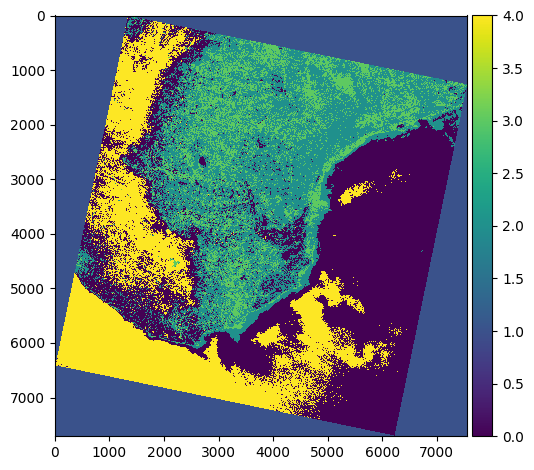

In [ ]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
from skimage import io
import numpy as np
from sklearn.cluster import KMeans

# Load the image
img = io.imread('/content/drive/MyDrive/LC09_L1TP_143054_20220322_20220322_02_T1_B3.png')

# Reshape the image to a 2D array of pixels
if img.ndim == 2:
    # Grayscale image
    rows, cols = img.shape
    ch = 1
else:
    # Color image
    rows, cols, ch = img.shape
pixels = img.reshape(rows*cols, ch)

# Perform k-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(pixels)
labels = kmeans.labels_

# Reshape the labels to the original image shape
labels = np.reshape(labels, (rows, cols))

# Display the segmented image
io.imshow(labels)
io.show()


**OBJECT DETECTION AND COUNTING IN THE IMAGE**

In [ ]:
import cv2
import numpy as np

# Load the segmented image
img = cv2.imread('/content/drive/MyDrive/LC09_L1TP_143054_20220322_20220322_02_T1_B3.png')

# Define the object of interest
object_label = 1 # e.g., 1 for buildings, 2 for trees, etc.

# Convert the input image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a binary mask using the red channel for the object of interest
mask = np.zeros(gray.shape, dtype=np.uint8)
mask[gray == object_label] = 255

# Apply morphological operations to remove noise and fill holes
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.dilate(mask, kernel, iterations=2)

# Find contours of objects
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count the number of objects
num_objects = len(contours)

# Draw the contours on the original image for visualization
img_contours = cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

from google.colab.patches import cv2_imshow

# Display the result
cv2_imshow(img_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
!cat /proc/cpuinfo


processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.138
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.27
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
!cat /proc/meminfo | grep MemTotal


MemTotal:       13297192 kB
